In [26]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1

In [36]:
day_dict={}
for filepath in glob.iglob('week13_data/KRAKEN/SRR*.kraken'):
    name=filepath[26:28]
    frequency_dict={}
    taxonomy=open(filepath)
    for line in taxonomy:
        full_tax=line.split(';')
        try:
            species=full_tax[-3]
            frequency_dict.setdefault(species,0)
            frequency_dict[species]+=1
        except IndexError:
            pass
    day_dict[name]=frequency_dict
    taxonomy.close()

93
83
89
97
90
86
94
88


In [28]:
day_df=pd.DataFrame(day_dict)

In [37]:
day_nonan=day_df.dropna()
normalized_day=day_nonan.div(day_nonan.sum(axis=0),axis=1)
normalized_day
normalized_day = normalized_day[["83","86","88","89","90","93","94", "97"]]
normalized_day.columns=['Day 0', 'Day 1','Day 2','Day 3', 'Day 4','Day 5','Day 6','Day 7']

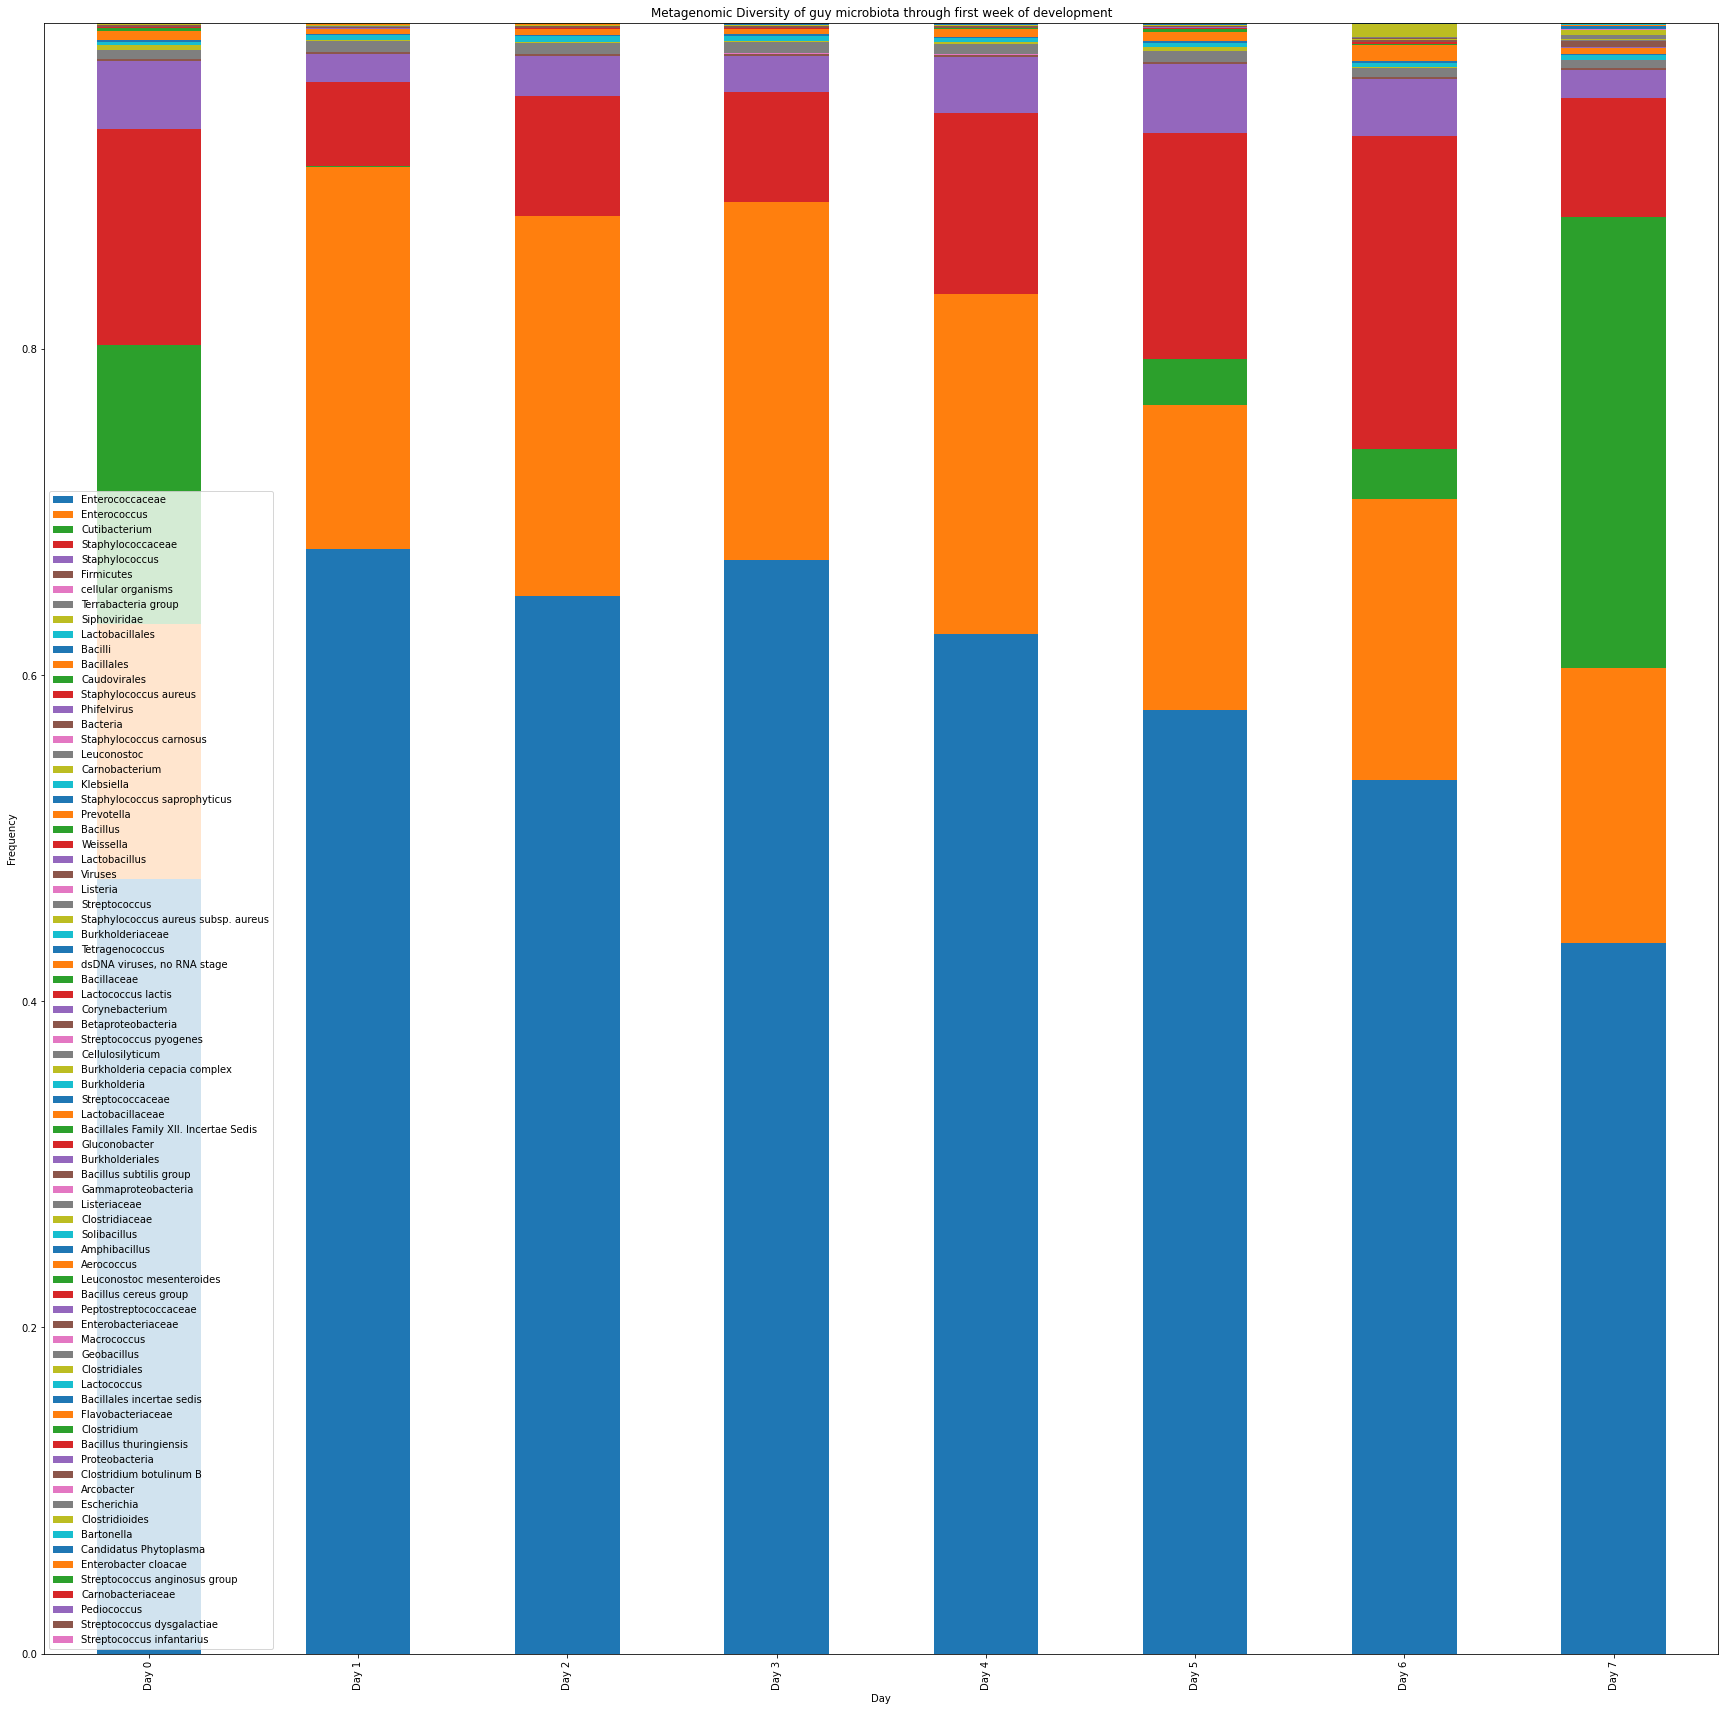

In [48]:
ax=normalized_day.transpose().plot.bar(stacked=True,figsize=(30,30))
plt.legend(loc='lower left')
ax.set_title('Metagenomic Diversity of guy microbiota through first week of development')
ax.set_ylabel('Frequency')
ax.set_xlabel('Day')
plt.show()

## Question 1

It appears that there is an increase in diversity throughout the week, and it also appears that enterococcaceae decreases throughout the week with the exception of day 1. Cultibacterium also seems to have large variance throughout the week.

## Question 2: alignment, GC content, 16 sRNA/sRDNA

bwa index assembly.fasta

bwa mem assembly.fasta READS/SRR492183_1.fastq READS/SRR492183_2.fastq > day083.sam
bwa mem assembly.fasta READS/SRR492186_1.fastq READS/SRR492186_2.fastq > day086.sam
bwa mem assembly.fasta READS/SRR492188_1.fastq READS/SRR492188_2.fastq > day088.sam
bwa mem assembly.fasta READS/SRR492189_1.fastq READS/SRR492189_2.fastq > day089.sam
bwa mem assembly.fasta READS/SRR492190_1.fastq READS/SRR492190_2.fastq > day090.sam
bwa mem assembly.fasta READS/SRR492193_1.fastq READS/SRR492193_2.fastq > day093.sam
bwa mem assembly.fasta READS/SRR492194_1.fastq READS/SRR492194_2.fastq > day094.sam
bwa mem assembly.fasta READS/SRR492197_1.fastq READS/SRR492197_2.fastq > day097.sam

samtools view -S -b day083.sam > day083.bam
samtools view -S -b day086.sam > day086.bam
samtools view -S -b day088.sam > day088.bam
samtools view -S -b day089.sam > day089.bam
samtools view -S -b day090.sam > day090.bam
samtools view -S -b day093.sam > day093.bam
samtools view -S -b day094.sam > day094.bam
samtools view -S -b day097.sam > day097.bam

bash Samconvert.sh
    ##(NOTE: see line line below this for full bash script)

conda activate metabat2
jgi_summarize_bam_contig_depths --outputDepth depth.txt *.bam

conda deactivate 
conda activate metabat
metabat2 -i assembly.fasta -a depth.txt -o bins_dir/bin



## Samconvert.sh

#!/bin/bash
for FILENAME in *.sam
do
    samtools sort -o ${FILENAME%.sam}.bam -O bam $FILENAME
done

They can be grouped together in short alignment, but this does not guarantee that all regions may be fully informative compared to others. The alignment metrics could involve something like hamming distance between sequences, along with analyzing GC composition.

## Question 3

A) We ended up with 6 bins.
B) With a net file size of roughly 13.1 mb, and the assembly being 38.9 mb, the percentage would be 13.1/38.9 * 100 = 35%. This means that the bins cover ~35% of the assembly.
C) The bins appear to be about 0.5 mb, which seems reasonable, as bacterial genomes are ~0.5-10 mb. With some potential loss of coverage due to noise, this seems possible.
D) While potentially time-involved, global alignment with BLASR databases could accomplish this. 

## Step 3

Command line: (Bash script included in a markdown line below)

bash extract_species.sh


#!/bin/bash
touch bin_identities.bar
for FILENAME in bins/*
do 
    line=$(head -n 1 $FILENAME);
    line="${line:1}"
    echo "$line"
    grep "$line" week13_data/KRAKEN/assembly.kraken >>bin_identities.txt
done

## Question 4

A)

Bin 1 is Staphylococcus haemolyticus JCSC1435. 
Bin 2 is Leuconostoc citreum KM20.
Bin 3 is Staphylococcus lugdunensis HKU09-01.
Bin 4 is Enterococcus faecalis OG1RF.
Bin 5 is Cutibacterium avidum 44067.
Bin 6 is Staphylococcus epidermidis RP62A.
Bin 7 is Staphylococcus aureus subsp. aureus CN1.
Bin 8 is Anaerococcus prevotii DSM 20548.
They all belong to the Terrabacteria group. 

B) 

A more robust method would involve actually aligning genomes, perhaps through utilizing the algorithms utilized in a program like Kallisto. 


## Step 4: Heatmap Generation

In [46]:
abundance_chart = pd.read_csv("abundance_table.tab",delimiter='\t')

abundance_chart = abundance_chart[["Genomic bins","SRR492183","SRR492185",
"SRR492186","SRR492188","SRR492190","SRR492193","SRR492194","SRR492197"]]

genus_names = ["Staphylococcus haemolyticus","Enterococcus faecalis","Leuconostoc citreum",
                   "Cutibacterium avidum","Staphylococcus epidermidis","Staphylococcus aureus",
                   "Anaerococcus prevotii","Staphylococcus lugdunensis"]

abundance_chart["Genomic bins"] = genus_names
a = abundance_chart.set_index("Genomic bins")
a.columns = ['Day 0','Day 1','Day 2','Day 3', 'Day 4','Day 5','Day 6','Day 7']
a

,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Genomic bins,,,,,,,,
Staphylococcus haemolyticus,50.103235,175.127948,167.273691,102.432386,14.523105,172.449773,53.357374,72.544371
Enterococcus faecalis,4115.242526,9219.720953,9348.741359,8139.870719,5267.858711,6267.155205,6550.505763,8745.103316
Leuconostoc citreum,1.751119,9.170054,8.887730,5.838109,4.583909,1.804228,3.259988,19.275630
Cutibacterium avidum,1566.783656,0.747395,0.552469,0.875860,1.251430,315.740755,457.543378,4250.653466
Staphylococcus epidermidis,1335.147536,850.342196,820.872805,1033.761424,1071.641137,1670.022745,1187.660153,936.681889
Staphylococcus aureus,1.287979,2.312693,1.452063,1.347894,3.287205,6.459688,1124.427189,590.194971
Anaerococcus prevotii,0.186461,0.181546,0.065351,4.223711,0.259990,1.211367,73.851083,3366.910935
Staphylococcus lugdunensis,2.555610,6.237916,6.194380,0.475050,0.491073,78.291586,6.639770,10.595311


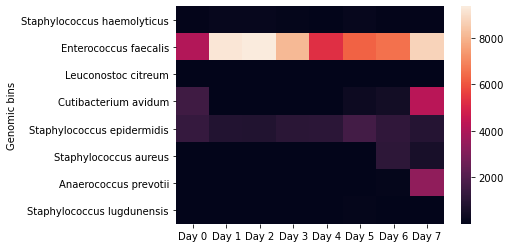

In [47]:
ax=sns.heatmap(a)

## Question 5

The largest group in both analyses came from enteroccocae. The next most abundant groups were staphylococcus and cutibacterium for the first and last days. It is odd that they drop off in between, but it's possible that initial variation in the mother's microbiome contributed to the larger abundance on the first day. The two charts definitely share their differences, including differences in abundance on different days. However, it does appear that both charts seem to have similar focus on the larger groups.